In [40]:
import sys, os
sys.path.append(os.path.abspath('..'))
import src.utils as rw
import importlib
import numpy as np

importlib.reload(rw)

<module 'src.utils' from '/workspaces/RandomWalk/src/utils.py'>

In [41]:
SEED = 42

In [42]:
walk_1 = rw.generate_srw(10, dim=2, seed=SEED)
for i, (x, y) in enumerate(walk_1):
    print(f"step {i:2d}: ({x:0.0f}, {y:0.0f})")

step  0: (0, 0)
step  1: (-1, 0)
step  2: (-1, -1)
step  3: (-2, -1)
step  4: (-3, -1)
step  5: (-2, -1)
step  6: (-2, -2)
step  7: (-1, -2)
step  8: (0, -2)
step  9: (1, -2)
step 10: (1, -3)


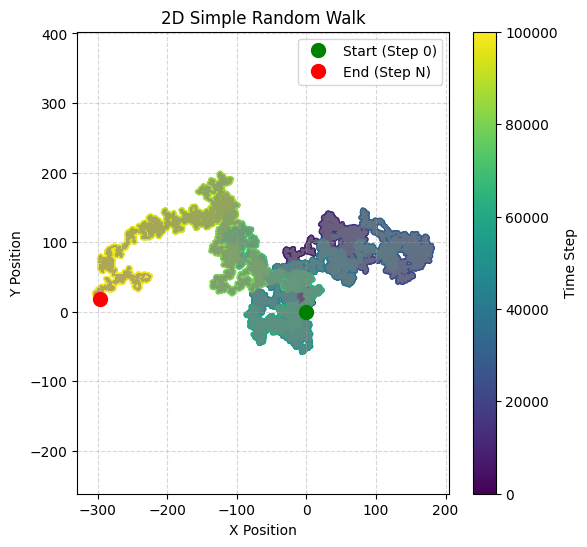

In [43]:
walk_2 = rw.generate_srw(100000, dim=2, seed=SEED)
rw.plot_2d_walk(walk_2)

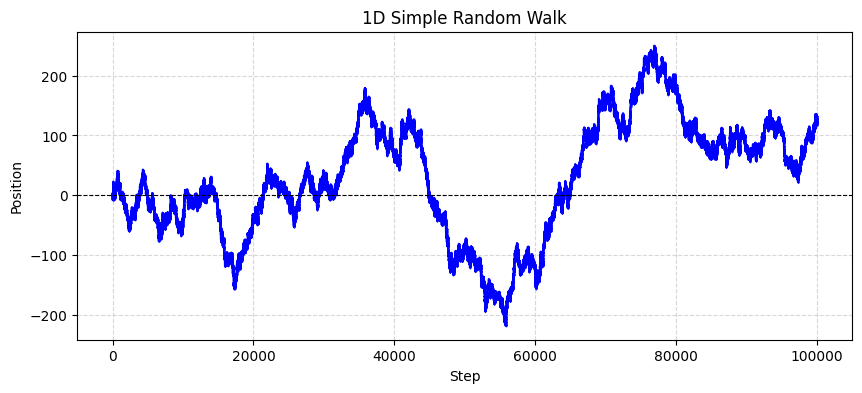

In [44]:
walk_3 = rw.generate_srw(100000, dim=1, seed=SEED)
rw.plot_1d_walk(walk_3)

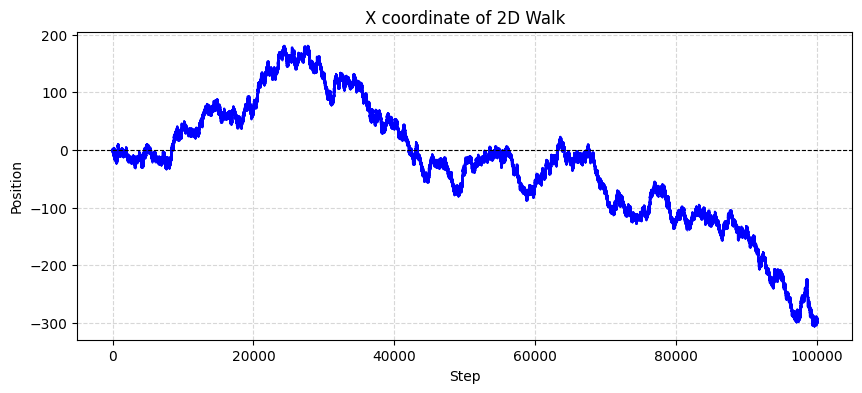

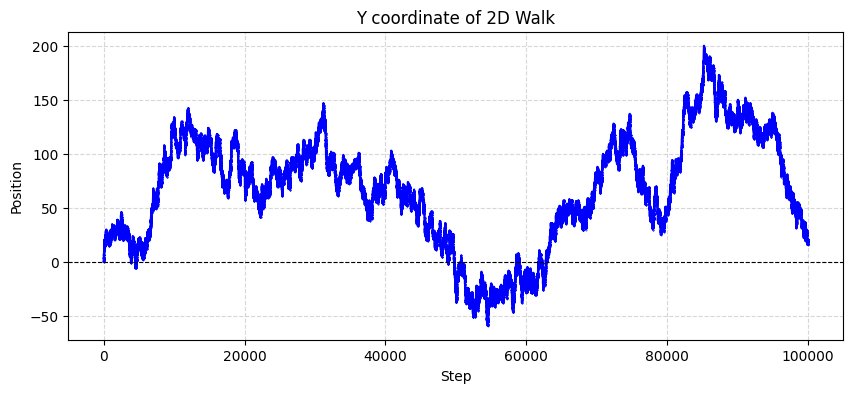

In [45]:
rw.plot_1d_walk(walk_2[:, 0], "X coordinate of 2D Walk")
rw.plot_1d_walk(walk_2[:, 1], "Y coordinate of 2D Walk")

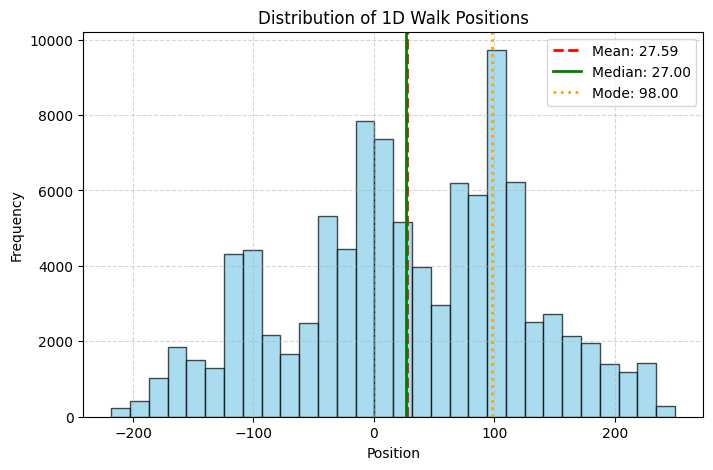

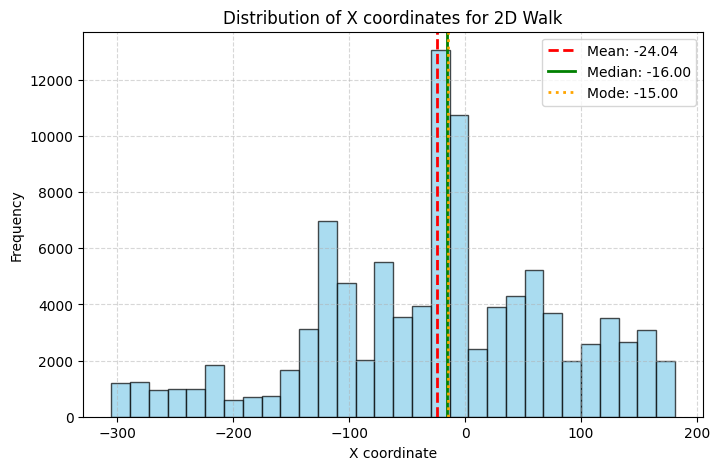

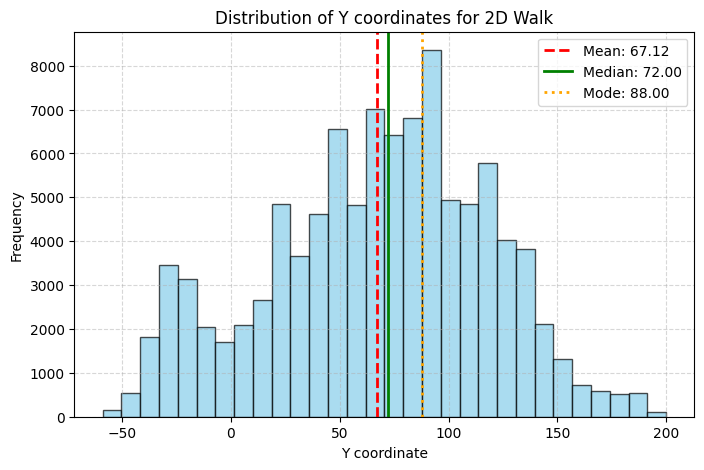

In [46]:
rw.plot_distribution(walk_3, title="Distribution of 1D Walk Positions", xlabel="Position", ylabel="Frequency")
rw.plot_distribution(walk_2[:, 0], title="Distribution of X coordinates for 2D Walk", xlabel="X coordinate", ylabel="Frequency")
rw.plot_distribution(walk_2[:, 1], title="Distribution of Y coordinates for 2D Walk", xlabel="Y coordinate", ylabel="Frequency")

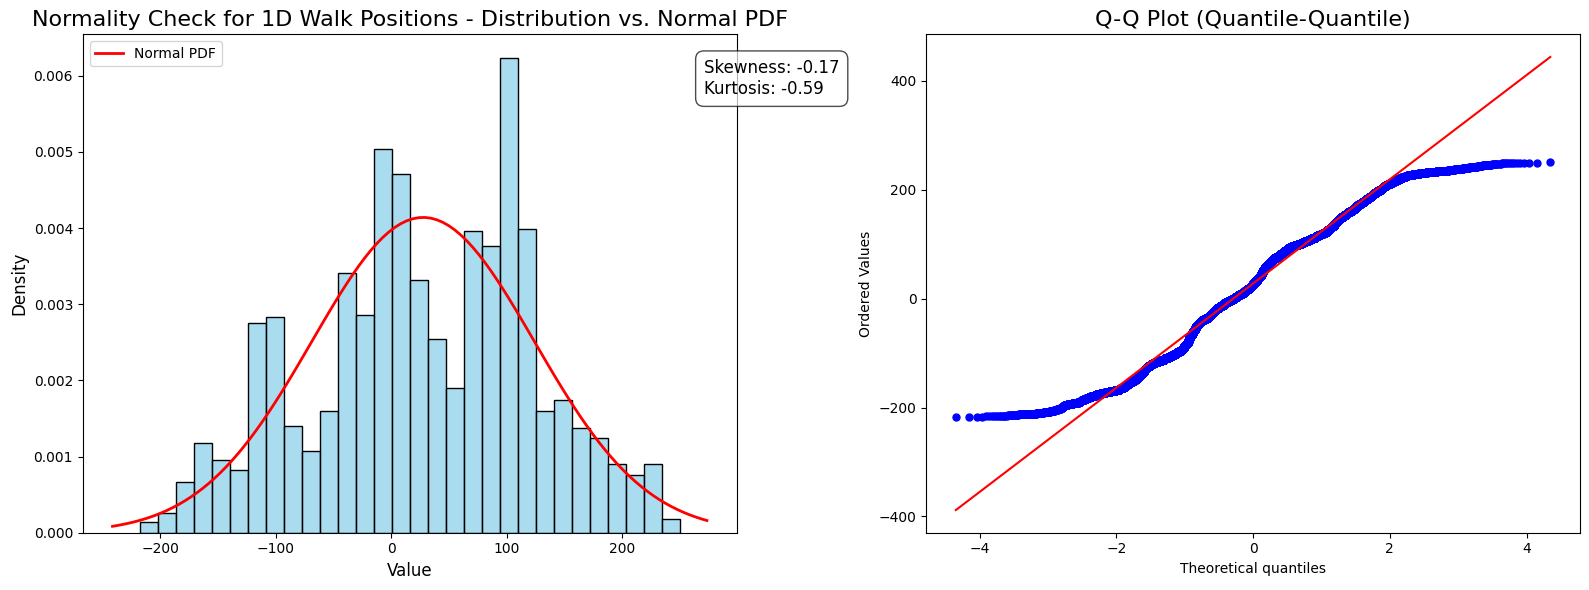

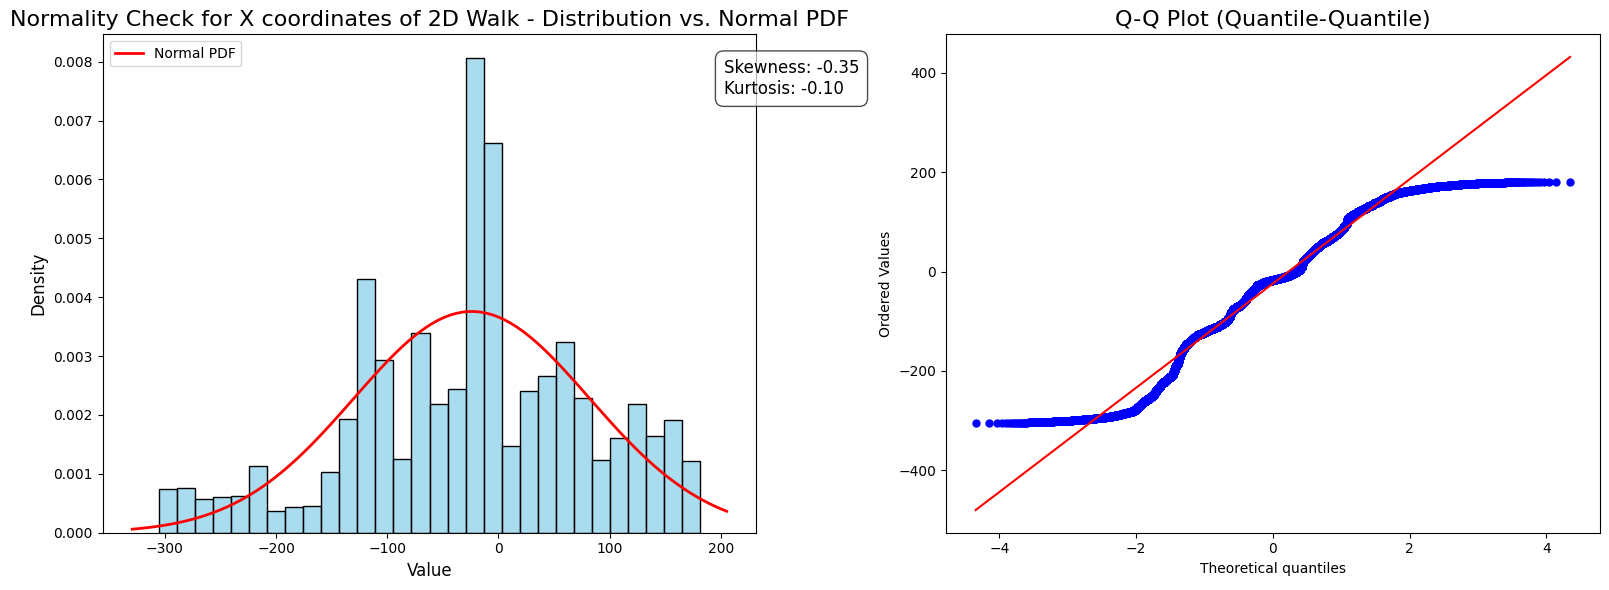

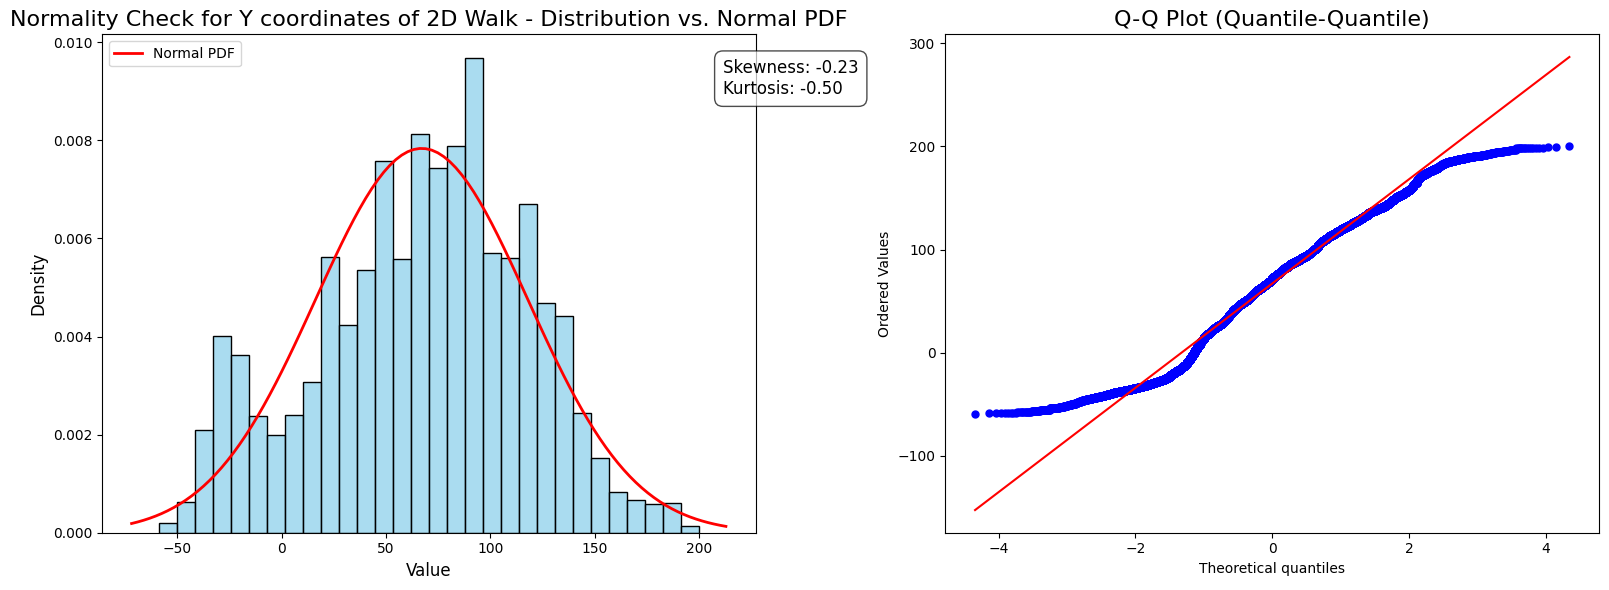

In [47]:
rw.plot_normality_check(walk_3, title="Normality Check for 1D Walk Positions")
rw.plot_normality_check(walk_2[:, 0], title="Normality Check for X coordinates of 2D Walk")
rw.plot_normality_check(walk_2[:, 1], title="Normality Check for Y coordinates of 2D Walk")

In [48]:
ensemble_1 = rw.generate_ensemble(num_walks=500, num_steps=1000, dim=1, initial_seed=SEED)
print(ensemble_1)

[[[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  1]
  [ -1]
  [  1]
  ...
  [ -1]
  [  1]
  [ -1]]

 [[  2]
  [  0]
  [  2]
  ...
  [ -2]
  [  0]
  [  0]]

 ...

 [[ 24]
  [-22]
  [  6]
  ...
  [ -4]
  [-20]
  [ 38]]

 [[ 23]
  [-23]
  [  5]
  ...
  [ -3]
  [-21]
  [ 37]]

 [[ 22]
  [-22]
  [  4]
  ...
  [ -2]
  [-22]
  [ 36]]]


In [49]:
final_positions = ensemble_1[-1, :, 0]
final_positions[:20]

array([ 22, -22,   4,   6,  46,  64,  20,  48, -12,  -6,  46,  20, -10,
        30, -28, -26,   0,  20, -24,  22])

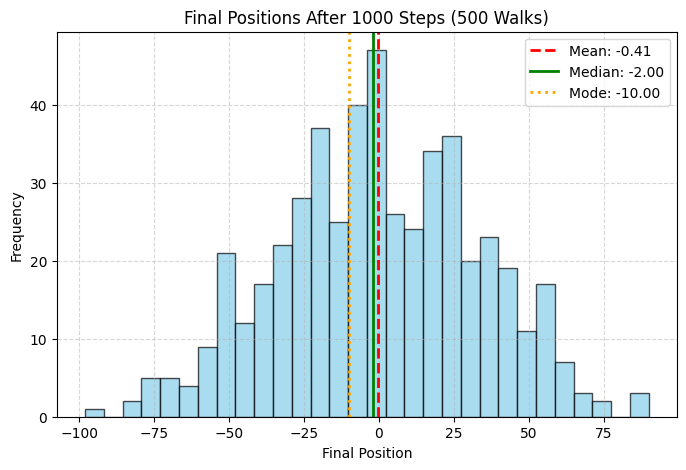

In [50]:
rw.plot_distribution(
    data=final_positions,
    bins=30,
    title="Final Positions After 1000 Steps (500 Walks)",
    xlabel="Final Position",
    ylabel="Frequency"
)

In [51]:
mean = np.mean(final_positions)
variance = np.var(final_positions)

print(f"Mean of final positions:     {mean:.3f}")
print(f"Variance of final positions: {variance:.3f}")


Mean of final positions:     -0.408
Variance of final positions: 1125.946


We simulated 500 independent 1D simple random walks of 1000 steps each. Each walk starts at 0 and moves by +1 or −1 at each step with equal probability.

The sample mean of the final positions is approximately −0.41, which is very close to 0. This matches the theory: because the walk is symmetric with no drift, the expected final position after $N$ steps is 0.

The sample variance of the final positions is about 1126. For a simple random walk with step size 1 and equal probabilities of ±1, the theoretical variance after $N$ steps is $N$. With $N=1000$, our observed variance is close to this value, which confirms the expected behavior.
